# Variance Estimation

This notebook provides a corrected derivation of the relationship between the population
variance and the sample variance. Specifically, this notebook explains why the denominator
of the population variance is $n$, the number of samples, and the denominator of the sample
variance is $n-1$. This notebook also will illustrate the difference using a numerical
experiment in Python, and demonstrates embedding equations using $\LaTeX$.

## Theoretical Variance

Begin by defining the theoretical variance of a single random variable $X$:
$$
\begin{align*}
\operatorname{\mathbb{V}ar}\left[X\right]
& =
\operatorname{\mathbb{E}}\left[\left(X - \operatorname{\mathbb{E}\left[X\right]}\right)^2\right]
\\
& =
\operatorname{\mathbb{E}}\left[X^2\right] - \operatorname{\mathbb{E}}\left[X\right]^2
\end{align*}
$$
The second equivalent formula is derived by expanding the square, recognizing that the
expectation of a random variable is a constant, and that the expectation of a constant
is the constant. Like the theoretical mean $\operatorname{\mathbb{E}}\left[X\right]$ the
theoretical variance $\operatorname{\mathbb{V}ar}\left[X\right] $ is a property of the
theoretical probability $\operatorname{\mathbb{P}}\left[X\right]$.

## Empirical Variance

The empirical variance is a property of the observed samples, usually called *The Data*.
For $n$ observations, we denote our observed samples as $X_1,\dots,X_n$. There are two
formulas that are commonly used to express the empirical variance, the population variance
and the sample variance. The two formula differ only in their respective denominators.

Before moving on to the definitions, recall the definition of the empirical mean (average,
or expectation):
$$
\begin{align*}
\bar{X}
& =
\frac{1}{n} \cdot \left(X_1 + \cdots + X_n\right)
\\
& =
\frac{1}{n} \cdot \sum_{i} X_i
\end{align*}
$$
In the last equation we have introduced the summation over the index $i$ to abbreviate the
explicit summation.

### Population Variance

The population variance is a statistic of the observed samples. As such it is a random
variable as well. It looks like the arithmetic mean of the theoretical variance of the,
but without taking the expectation $\operatorname{\mathbb{E}}$. Keeping with our convention
of denoting random variables with capital letters we have:
$$
\begin{align*}
S_\text{pop}^2
& =
\frac{1}{n} \cdot \left(\left(X_1 - \bar{X}\right)^2 + \cdots + \left(X_n - \bar{X}\right)^2\right)
\\
& = 
\frac{1}{n} \cdot \sum_{i} \left(X_i - \bar{X}\right)^2
\end{align*}
$$
Pay attention to the differences in the squares. The difference is between each observed
sample $X_i$ and the empirical mean $\bar{X}$ of all the observed samples.

### Sample Variance

The sample variance is very similarly defined with the difference that the denominator of
the fraction is $n-1$ instead of $n$:
$$
\begin{align*}
S_\text{samp}^2
& =
\frac{1}{n-1} \cdot \left(\left(X_1 - \bar{X}\right)^2 + \cdots + \left(X_n - \bar{X}\right)^2\right)
\\
& = 
\frac{1}{n-1} \cdot \sum_{i} \left(X_i - \bar{X}\right)^2
\end{align*}
$$
The popular heuristic explanation of the difference comes from the idea of degrees of
freedom. The idea behind degrees of freedom is that they count how many distinct values we
can derive from an initial set of values, before we are redundantly representing the initial
values. If the observed samples are from independently conducted trails then we start with
$n$ degrees of freedom. By computing the empirical mean we used up $1$ degree of freedom.
Thus we have $n-1$ degrees of freedom left to calculate the sample variance. This implies
that you need two or more observations to have a well defined sample variance.

### Biased and Unbiased Estimators

When the observed samples are from independently conducted, identically distributed trials
we can derive a relationship between the theoretical variance, population variance, and 
sample variance. We denote the observed samples $X_1,\dots,X_n$ as having the same
probability as our theoretical random variable $X$ using the following notation:
$$
X_1,\dots,X_n\overset{\operatorname{\mathbb{P}}}{\sim}X
$$
Begin by recalling that we defined a statistic as any function of our random samples
$f\left(X_1, \dots, X_n\right)$. The statistic is said to be an unbiased estimator
of a property $\operatorname{\mathbb{F}}\left[X\right]$ of our theoretical random variable
$X$, if the theoretical estimation of our statistic equals our theoretical
property:
$$
\begin{align*}
\operatorname{\mathbb{E}}\left[f\left(X_1, \dots, X_n\right)\right]
& =
\operatorname{\mathbb{F}}\left[X\right]
\end{align*}
$$
The intuition is that our statistic gets the right answer on average, as long as everything
is identically distributed.

We are now ready to tackle the crux of this notebook. We will show that the population
variance $S_{\text{pop}}^2$ is a **biased** estimator of the theoretical variance
$\operatorname{\mathbb{V}ar}\left[X\right]$. Furthermore, the population variance is biased
in a very simple manner, that is corrected by the sample variance. We proceed by directly
computing the expectation of the population variance:
$$
\begin{align*}
\operatorname{\mathbb{E}}\left[S_{\text{pop}}^2\right]
& =
\operatorname{\mathbb{E}}\left[\frac{1}{n} \cdot \sum_{i} \left(X_i - \bar{X}\right)^2\right]
\\
& =
\frac{1}{n} \cdot \sum_{i}\operatorname{\mathbb{E}}\left[X_i^2\right] - 
\frac{1}{n} \cdot \sum_{i}\operatorname{\mathbb{E}}\left[2 \cdot X_i \cdot \bar{X}\right] + 
\frac{1}{n} \cdot \sum_{i}\operatorname{\mathbb{E}}\left[\bar{X}^2\right]
\\
& =
\operatorname{\mathbb{E}}\left[X^2\right] \cdot \sum_{i} \frac{1}{n} - 
2 \cdot \operatorname{\mathbb{E}}\left[\bar{X} \cdot \frac{1}{n} \cdot \sum_{i} X_i \right] + 
\operatorname{\mathbb{E}}\left[\bar{X}^2\right] \cdot \sum_{i} \frac{1}{n}
\\
& =
\operatorname{\mathbb{E}}\left[X^2\right] - 
\operatorname{\mathbb{E}}\left[ \bar{X}^2 \right]
\\
& =
\operatorname{\mathbb{E}}\left[X^2\right] - 
\frac{1}{n^2} \cdot \sum_i \sum_j \operatorname{\mathbb{E}}\left[ X_i \cdot X_j \right]
\\
& =
\operatorname{\mathbb{E}}\left[X^2\right] - 
\frac{1}{n^2} \cdot
\left(
\sum_i \operatorname{\mathbb{E}}\left[ X_i^2\right] +
2 \cdot \sum_{i < j}
\operatorname{\mathbb{E}}\left[ X_i\right] \cdot
\operatorname{\mathbb{E}}\left[ X_j \right]
\right)
\\
& =
\operatorname{\mathbb{E}}\left[X^2\right] - 
\operatorname{\mathbb{E}}\left[ X^2\right] \cdot \sum_i \frac{1}{n^2} -
\operatorname{\mathbb{E}}\left[ X\right]^2 \cdot \sum_{i < j} \frac{2}{n^2}
\\
& =
\operatorname{\mathbb{E}}\left[X^2\right] - 
\frac{1}{n} \cdot \operatorname{\mathbb{E}}\left[ X^2\right] -
\frac{2}{n^2} \cdot \frac{n \cdot \left(n-1\right)}{2} \cdot
\operatorname{\mathbb{E}}\left[ X\right]^2
\\
& =
\frac{n-1}{n} \cdot 
\left(
\operatorname{\mathbb{E}}\left[X^2\right] -
\operatorname{\mathbb{E}}\left[ X\right]^2
\right)
\\
& =
\frac{n-1}{n} \operatorname{\mathbb{V}ar}\left[X\right]
\end{align*}
$$
The end result is that the population variance is a biased estimator of the theoretical
variance. On average the population variance underestimates the theoretical variance.
However, the population variance does eventually equal the theoretical variance as the
number of observed samples grows large $n \rightarrow \infty$. We can correct the bias
by multiplying by the inverse of the bias factor:
$$
\begin{align*}
\operatorname{\mathbb{V}ar}\left[X\right]
& =
\operatorname{\mathbb{E}}\left[\frac{n}{n-1} \cdot S_{\text{pop}}^2\right]
\\
& =
\operatorname{\mathbb{E}}\left[
\frac{n}{n-1} \cdot \frac{1}{n} \cdot \sum_{i} \left(X_i - \bar{X}\right)^2
\right]
\\
& =
\operatorname{\mathbb{E}}\left[
\frac{1}{n-1} \cdot \sum_{i} \left(X_i - \bar{X}\right)^2
\right]
\\
& =
\operatorname{\mathbb{E}}\left[S_{\text{samp}}^2\right]
\end{align*}
$$
Thus the sampling variance is an unbiased estimator of the theoretical variance.

In [1]:
import matplotlib.pyplot as mp
import numpy as np

## Numerical Studies

We can demonstrate this with a numerical experiment. We will draw samples from a random
variable $X$ that can take on the values of $X=-\sqrt{2}, 0, \sqrt{2}$ with equal probabilities
$\mathbb{P} = 1/4, 1/2, 1/4$ respectively. We will draw $100$ samples and plot both the
population and sample variance as the sample count increases. In turn we will repeat this
$10$ times to generate $10$ lines on the plot.

Note that the random variable has theoretical mean and variance:
$$
\begin{align*}
\operatorname{\mathbb{E}}\left[X\right]
& =
-\sqrt{2} \cdot \operatorname{\mathbb{P}}\left[X = -2\right] +
0 \cdot \operatorname{\mathbb{P}}\left[X = 0\right] +
\sqrt{2} \cdot \operatorname{\mathbb{P}}\left[X = 2\right]
\\
& =
- \frac{\sqrt{2}}{4} + \frac{\sqrt{2}}{4}
\\
& =
0
\\
\operatorname{\mathbb{V}ar}\left[X\right]
& =
\left(-\sqrt{2} - 0\right)^2 \cdot
\operatorname{\mathbb{P}}\left[X = -\sqrt{2}\right] +
\left(0 - 0\right)^2 \cdot
\operatorname{\mathbb{P}}\left[X = 0\right] +
\left(\sqrt{2} - 0\right)^2 \cdot
\operatorname{\mathbb{P}}\left[X = \sqrt{2}\right]
\\
& =
\frac{1}{2} + \frac{1}{2}
\\
& =
1
\end{align*}
$$

The script below makes heavy use of implicitly
[vectorized](https://en.wikipedia.org/wiki/Automatic_vectorization) functions instead of 
slower manual iteration.

In [2]:
def experiment(replications, trials, choices, probabilities):
    """
    Repeat `replications` number of random draw experiments, drawing `trials` number of
    observations from `choices`, with probabilities `probabilities`. The results are 
    plotted as a line graph:
    * Population variance - thin black line
    * Sample variance - thin blue line
    * Theoretical variance - thick blue dashes
    * Theoretical bias - thick black dashes
    """

    # Fresh hot cup of tea
    rg = np.random.default_rng()

    # Incremental number of observed samples
    ns = np.arange(1, trials+1, 1)

    # Observed samples across all trials
    xs = rg.choice(
        a = choices, 
        size = (replications, trials),
        replace = True,
        p = probabilities
    )

    # Incremental mean for each trial, computed along the row, across the columns
    ms = np.divide(np.cumsum(xs, 1), ns)

    # Incremental population variance for each trial, computed along the row, across the columns
    ps = np.divide(np.cumsum((xs - ms)**2, 1), ns)

    # Incremental sample variance for each trial, computed along the row, across the columns
    ss = np.zeros((replications, trials), float)
    ss[:, 1:] = np.divide(np.cumsum((xs - ms)**2, 1)[:, 1:], ns[:-1])

    # Population variance
    mp.plot(ns, np.transpose(ps), linewidth = 0.25, color = "black")

    # Sample variance
    mp.plot(ns, np.transpose(ss), linewidth = 0.25, color = "blue")

    # Theoretical variance
    mp.plot(np.ones(trials, int), linewidth = 4, color = "blue", linestyle = "dotted")

    # Bias from the theoretical variance
    mp.plot(1 - 1 / ns, linewidth = 4, color = "black", linestyle = "dotted")

## Run the Experiment

Try the experiment for your self. Modify the repetitions and observations to build your
intuition for how the population and sample variance evolve as more observations are
collected.

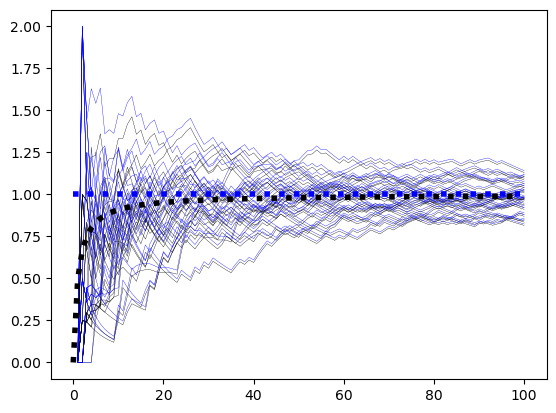

In [8]:
# Try changing the parameters
experiment(

    # Repetitions
    25,

    # Observations
    100,

    # Choices
    [-np.sqrt(2), 0, np.sqrt(2)],

    # Probablilies
    [1/4, 1/2, 1/4]
)